# Creating the Model Grid

Name: Manh Tuong Nguyen

Date: 10/22/24

In this notebook, I describe the creation of the grid I will use in my model.

First, import packages to re-create and visualize the model grid here:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

The grid for my model will be located on South China Sea and Gulf of Thailand 99-122$^{\circ}$E in longitude and 2-25$^{\circ}$N in latitude. The grid spacing will be $1/13^{\circ}$ in the zonal direction and $1/14^{\circ}$ in the meridional direction, covering a grid of 320 rows and 300 columns. (consider numbers with more prime factorization to further feed to super cpu)

In the data file for my model, I will specifiy the following parameters:

```
usingSphericalPolarGrid=.TRUE.,
delX=300*0.076923,
delY=320*0.071428,
xgOrigin=99,
ygOrigin=2,
```

This grid can be recreated in Python as follows:

In [51]:
# define the parameters that will be used in the data file
delX = 1/13
delY = 1/14
xgOrigin = 99
ygOrigin = 2
n_rows = 320
n_cols = 300

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

### Visualizing the Grid
The grids above can be visualized as follows:

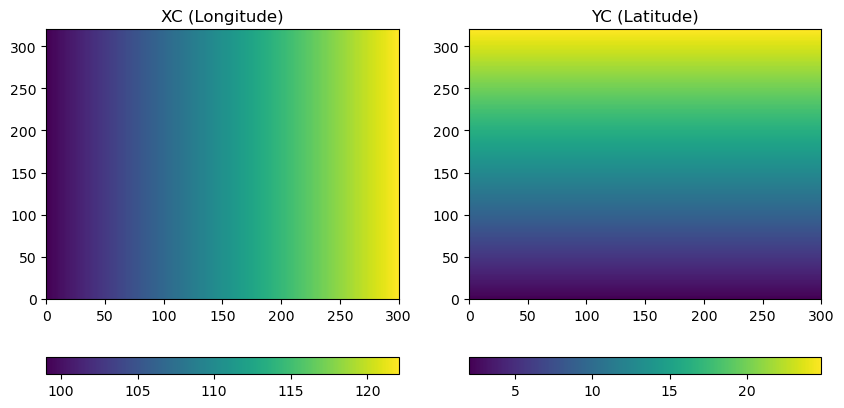

In [52]:
# make a plot of XC and YC
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(XC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')

plt.show()

### Visualizing the Grid on a Map with Cartopy
To get a sense of where the model is located on the globe, cartopy can be be used to plot the domain on the globe:

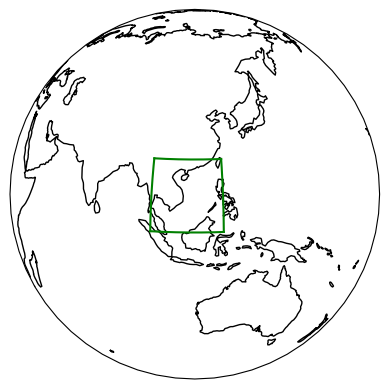

In [53]:
plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(113,14))

ax.plot(XC[:,0], YC[:,0], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.show()


### Visualizing the Grid Spacing
The model grid is defined in terms of units in longitude and latitude although it is useful to quantify the grid spacing in terms of more familiar units, such as meters. The `eccoseas` package has a `great_circle_distance` function that can quantify the distance between two points on the surface of the earth. First, import this module:

In [54]:
import sys
sys.path.insert(1,'/Users/mike/Documents/Research/Projects/Ocean_Modeling/Github Repositories')
from eccoseas.toolbox import distance as etd

Then, loop through the points to generate inter-point distances in the horizontal (`dXC`) and vertical (`dYC`) directions:

In [55]:
dXC = np.zeros((np.shape(XC)[0], np.shape(XC)[1]-1))
for row in range(np.shape(XC)[0]):
    for col in range(np.shape(XC)[1]-1):
        dXC[row,col] = etd.great_circle_distance(XC[row,col], YC[row,col], XC[row,col+1], YC[row,col+1])

dYC = np.zeros((np.shape(YC)[0]-1, np.shape(YC)[1]))
for row in range(np.shape(XC)[0]-1):
    for col in range(np.shape(XC)[1]):
        dYC[row,col] = etd.great_circle_distance(XC[row,col], YC[row,col], XC[row+1,col], YC[row+1,col])

Finally, make a plot of the inter-point distances:

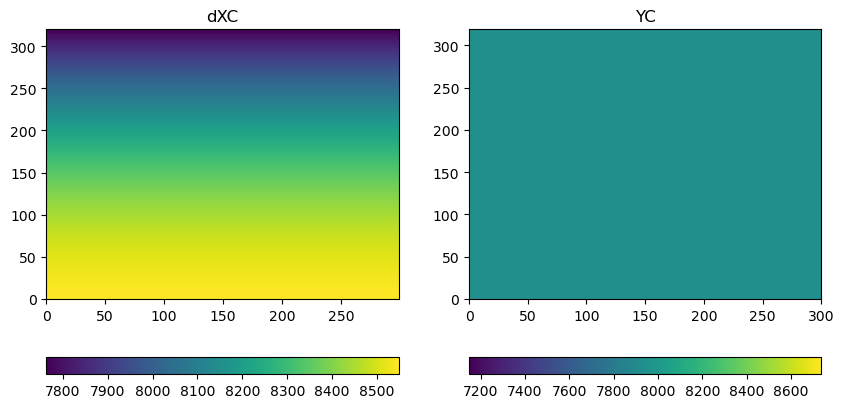

In [56]:
# make a plot of XC and YC
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(dXC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('dXC')

plt.subplot(1,2,2)
C = plt.pcolormesh(dYC.round(3))
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC')

plt.show()